# Profiting from classifiers
### Mini-project
In this project you apply your classification skills for solving a business problem.

Imagine that you are working for a bank. Last year the bank sent a mass direct mailing offer to promote the Personal Equity Plan (PEP). You collected the information about customers and their responses into the dataset [bank_data.csv](https://drive.google.com/file/d/13VEWvirEi-AQwQzZwVZxDSKwym0vAvIk/view?usp=sharing). 

You want to make use of these data to design a new mailing campaign with a higher response rate. The ultimate goal is to spend less for the campaign, but increase the overall profit (number of respondents).

The idea is to build a classification model from historical data, and use this classifier on new customers to predict who is more likely to respond. We can then selectively target only these customers, and not waste the effort on unpromising customer groups.

## Part 1. Building a model

### 1.1. Data exploration and preparation

In [21]:
file_name = "C:/Users/10705/Desktop/Notebooks/proj_ml_bank/bank-data.csv"

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# this creates a pandas.DataFrame using the id column for indexing
data = pd.read_csv(file_name, index_col ='id')

In [23]:
data.columns

Index(['age', 'sex', 'region', 'income', 'married', 'children', 'car',
       'save_act', 'current_act', 'mortgage', 'pep'],
      dtype='object')

In [24]:
data.head()

,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
id,,,,,,,,,,,
ID12101,48,FEMALE,INNER_CITY,17546.0,NO,1,NO,NO,NO,NO,YES
ID12102,40,MALE,TOWN,30085.1,YES,3,YES,NO,YES,YES,NO
ID12103,51,FEMALE,INNER_CITY,16575.4,YES,0,YES,YES,YES,NO,NO
ID12104,23,FEMALE,TOWN,20375.4,YES,3,NO,NO,YES,NO,NO
ID12105,57,FEMALE,RURAL,50576.3,YES,0,NO,YES,NO,NO,NO


The dataset contains the following variables/attributes for each potential customer: 
- id (String)
- age (int)
- sex {FEMALE,MALE}
- region {INNER_CITY,TOWN,RURAL,SUBURBAN}
- income (int)
- married {YES, NO}
- children (int)
- car {YES, NO}
- save_act - Saving account in our bank {Yes, No}
- current_act - Current account in our bank {YES, NO}
- mortgage {YES, NO}

And the last attribute - pep {YES, NO} is a target attribute: whether a customer responded to our promotion mail and joined a Personal Equity Plan.

To see correlation between attributes and response, we convert all attributes to numeric: .

In [25]:
# First, create a copy of the original data frame - to make a fully numeric dataset
df_num = data.copy()

# we need to replace 'sex', 'region', 'married', 'car', 'save_act', 'current_act', 'mortgage', 'pep'

The boolean values can be replaced with [0,1].

In [26]:
print(df_num['sex'].unique())
print(df_num['married'].unique())
print(df_num['car'].unique())
print(df_num['save_act'].unique())
print(df_num['current_act'].unique())
print(df_num['mortgage'].unique())
print(df_num['pep'].unique())

['FEMALE' 'MALE']
['NO' 'YES']
['NO' 'YES']
['NO' 'YES']
['NO' 'YES']
['NO' 'YES']
['YES' 'NO']


In [27]:
df_num['sex'].replace(['FEMALE', 'MALE'], [0,1], inplace=True)

df_num['married'].replace(['NO', 'YES'], [0,1], inplace=True)
df_num['car'].replace(['NO', 'YES'], [0,1], inplace=True)
df_num['save_act'].replace(['NO', 'YES'], [0,1], inplace=True)
df_num['current_act'].replace(['NO', 'YES'], [0,1], inplace=True)
df_num['mortgage'].replace(['NO', 'YES'], [0,1], inplace=True)
df_num['pep'].replace(['NO', 'YES'], [0,1], inplace=True)

In [28]:
print(df_num['region'].unique())
print(df_num['children'].unique())

['INNER_CITY' 'TOWN' 'RURAL' 'SUBURBAN']
[1 3 0 2]


The 'region' attribute with cardinality 4 should be replaced using [one hot encoding](https://datagy.io/sklearn-one-hot-encode/). Please refresh your knowledge about converting categorical attributes into numerics (binary).

In [29]:
# One-hot encoding a single column - region - using pandas
# use pd.concat to join the new columns with your original dataframe
df_num = pd.concat([df_num,pd.get_dummies(df_num['region'], prefix='region')],axis=1)

# now drop the original 'region' column (you don't need it anymore)
df_num.drop(['region'],axis=1, inplace=True)

For the attribute 'children' there are only 4 distinct values - it is not a truly numeric attribute, it is rather an ordinal attribute. It also does not seem reasonable to assume that the difference between childless families and the families with 1 child is the same as the difference between 1-child and 2-child families. So we should probably treat the number of children as a categorical attribute with cardinality 4.  

In [30]:
df_num['children'].replace([0,1,2,3], ["zero","one", "two", "three"], inplace=True)

In [31]:
df_num = pd.concat([df_num,pd.get_dummies(df_num['children'], prefix='children')],axis=1)

# now drop the original 'country' column (you don't need it anymore)
df_num.drop(['children'],axis=1, inplace=True)

Reordering to place the target variable into the first column.

In [32]:
target = df_num.pop("pep")

df_num.insert(0, target.name, target)

In [33]:
df_num.columns

Index(['pep', 'age', 'sex', 'income', 'married', 'car', 'save_act',
       'current_act', 'mortgage', 'region_INNER_CITY', 'region_RURAL',
       'region_SUBURBAN', 'region_TOWN', 'children_one', 'children_three',
       'children_two', 'children_zero'],
      dtype='object')

<AxesSubplot:>

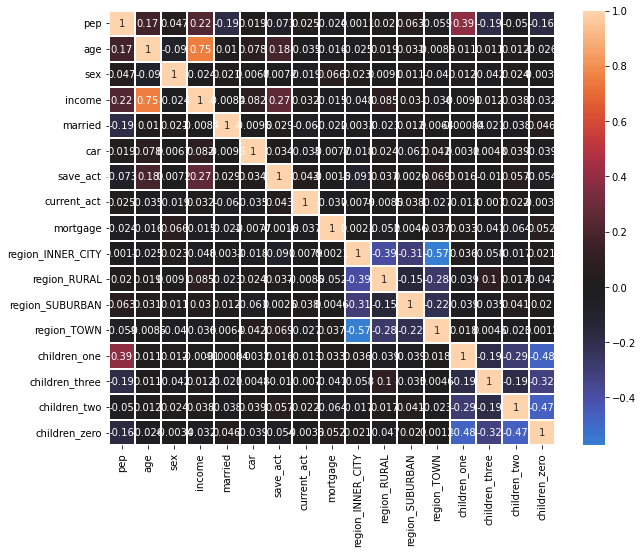

In [34]:
fig, ax = plt.subplots(figsize=(10,8)) 
corr = df_num.corr()
sns.heatmap(corr, center=0, annot=True, linewidths=.1, ax=ax)

In [35]:

X = df_num.drop(columns=['pep'])
y = df_num['pep'].values
print(X)
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
#20% as test population

         age  sex    income  married  car  save_act  current_act  mortgage  \
id                                                                           
ID12101   48    0  17546.00        0    0         0            0         0   
ID12102   40    1  30085.10        1    1         0            1         1   
ID12103   51    0  16575.40        1    1         1            1         0   
ID12104   23    0  20375.40        1    0         0            1         0   
ID12105   57    0  50576.30        1    0         1            0         0   
...      ...  ...       ...      ...  ...       ...          ...       ...   
ID12696   61    0  47025.00        0    1         1            1         1   
ID12697   30    0   9672.25        1    1         1            1         0   
ID12698   31    0  15976.30        1    1         1            0         0   
ID12699   29    1  14711.80        1    0         1            0         1   
ID12700   38    1  26671.60        0    1         0            1

## 1.2. Classifiers
We learned about the following classifiers: 
- __Logistic Regression__
- __Support Vector Machines__
- __Decision Trees__
- __k-Nearest Neighbors__
- __Naive Bayes__

We explore each classifier in turn, trying to build the model with the best accuracy for the test set.
We compare classifiers using 10-20 fold cross validation. Do not forget to normalize numeric attributes. After each experiment, use statistical comparison to find out if the current classifier is better than the previous one.

__The best score that I managed to achieve was 89.7. So you should not settle for anything less than 89.5.__

Document all your experiments in the cells below.

### Classifiers that work only with numeric attributes

### K-NN
Use all your knowledge from the K-NN lab to build the K-NN classifier with the best prediction rate. 

Baseline experiement

In [36]:
from sklearn.neighbors import KNeighborsClassifier
#use regressor as our target is a number.see 1.6.3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.7587064676616916
0.5656565656565656


Now we need to apply normalization

In [37]:
normalized = df_num.copy()
for attribute in df_num.columns:
    min = df_num[attribute].min()
    max = df_num[attribute].max()
    divider = max - min
    normalized[attribute] = ((normalized[attribute]-min)/divider)
X = normalized.drop(columns=['pep'])
y = normalized['pep'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
#print(X,y)


In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
#use regressor as our target is a number.see 1.6.3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))
cv_scores = cross_val_score(knn, X, y, cv=20)

#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

0.8731343283582089
0.7575757575757576
[0.83333333 0.7        0.7        0.83333333 0.66666667 0.73333333
 0.76666667 0.76666667 0.83333333 0.76666667 0.73333333 0.7
 0.86666667 0.73333333 0.73333333 0.66666667 0.7        0.63333333
 0.73333333 0.73333333]
cv_scores mean:0.7416666666666665


So that the default value of K = 3 does not work. Now I start to search for best K values.

In [39]:
from sklearn.model_selection import GridSearchCV

#create new a knn model
new_knn = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
grid_dictionary = {'n_neighbors': np.arange(1,100)}


#use gridsearch to test all values for n_neighbors
GScv = GridSearchCV(new_knn, grid_dictionary, cv=20)

#fit model to data
GScv.fit(X,y)

print(GScv.best_params_)


{'n_neighbors': 21}


In [40]:
from sklearn.model_selection import GridSearchCV

#create new a knn model
new_knn = KNeighborsClassifier(weights="distance")

#create a dictionary of all values we want to test for n_neighbors
grid_dictionary = {'n_neighbors': np.arange(1,100)}


#use gridsearch to test all values for n_neighbors
GScv = GridSearchCV(new_knn, grid_dictionary, cv=20)

#fit model to data
GScv.fit(X,y)

print(GScv.best_params_)

{'n_neighbors': 21}


So that the best value of K is 21 for both weights.

In [41]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))
cv_scores = cross_val_score(knn, X, y, cv=10)

#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))


knn = KNeighborsClassifier(n_neighbors=21, weights="distance")
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))
cv_scores = cross_val_score(knn, X, y, cv=20)

#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

0.763681592039801
0.8383838383838383
[0.83333333 0.78333333 0.78333333 0.78333333 0.85       0.76666667
 0.81666667 0.66666667 0.73333333 0.78333333]
cv_scores mean:0.78
1.0
0.8434343434343434
[0.93333333 0.73333333 0.73333333 0.76666667 0.86666667 0.8
 0.7        0.83333333 0.86666667 0.86666667 0.76666667 0.76666667
 0.86666667 0.76666667 0.73333333 0.73333333 0.76666667 0.73333333
 0.83333333 0.8       ]
cv_scores mean:0.7933333333333334


Now I am trying to add weights using their correlations

<AxesSubplot:>

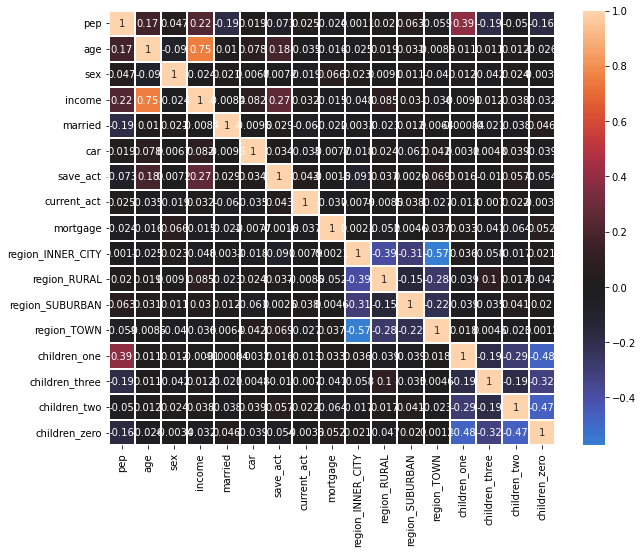

In [42]:
fig, ax = plt.subplots(figsize=(10,8)) 
corr = normalized.corr()
sns.heatmap(corr, center=0, annot=True, linewidths=.1, ax=ax)

In [43]:
corr = normalized.corr()
weighted = normalized.copy()
for attribute in corr.columns:
    correlation = corr.iloc[0][attribute]
    weighted[attribute] = abs((weighted[attribute])/correlation)
X = weighted.drop(columns=['pep'])
y = weighted['pep'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
#print(X,y)
#use regressor as our target is a number.see 1.6.3
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))
cv_scores = cross_val_score(knn, X, y, cv=20)

#print each cv score (accuracy) and average them
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))


#create new a knn model


1.0
0.5757575757575758
[0.6        0.73333333 0.6        0.66666667 0.7        0.63333333
 0.63333333 0.7        0.6        0.66666667 0.6        0.7
 0.63333333 0.6        0.7        0.66666667 0.63333333 0.56666667
 0.6        0.63333333]
cv_scores mean:0.6433333333333333


A possible reason for this small-increase is that we somewhat make some more important features closer. The justification for only 1 neighbor is below.

In [44]:
new_knn = KNeighborsClassifier(weights="distance")

#create a dictionary of all values we want to test for n_neighbors
grid_dictionary = {'n_neighbors': np.arange(1,100)}


#use gridsearch to test all values for n_neighbors
GScv = GridSearchCV(new_knn, grid_dictionary, cv=20)

#fit model to data
GScv.fit(X,y)

print(GScv.best_params_)    

{'n_neighbors': 1}


### Logistic Regression
Try Logistic Regression. Try different Expectation Maximization algorithms. Maybe some variations of regularization? 

Is your Log Regr score better than the K-NN score? Is it significantly better? If the scores do not differ significantly, you may continue with any of them. Otherwise, continue with the better classifier.

In [45]:
X = normalized.drop(columns=['pep'])
y = normalized['pep'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [46]:
from sklearn.linear_model import LogisticRegression
regr =LogisticRegression(max_iter=1000000000000000000)
regr.fit(X_train,y_train)
trainscore = regr.score(X_train,y_train)
testscore = regr.score(X_test,y_test)
print(trainscore,testscore)
print(regr.coef_)
coef = regr.coef_
# regr2 = LogisticRegression()
# regr2.fit(X2_train,y_train)
# trainscore2 = regr2.score(X2_train,y_train)
# testscore2 = regr2.score(X2_test,y_test)
# print(trainscore2,testscore2)
cv_scores = cross_val_score(regr, X, y, cv=20)
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

0.7512437810945274 0.7424242424242424
[[ 0.49118493  0.07225463  2.08295967 -0.96067141  0.1585994  -0.79165069
   0.05242193 -0.06410494 -0.13812034 -0.00303145  0.50365595 -0.36248055
   1.73568838 -1.01545747 -0.22073015 -0.49947715]]
[0.8        0.76666667 0.8        0.76666667 0.7        0.66666667
 0.6        0.66666667 0.83333333 0.9        0.6        0.73333333
 0.73333333 0.76666667 0.56666667 0.7        0.73333333 0.73333333
 0.73333333 0.73333333]
cv_scores mean:0.7266666666666663


So even the most basic logistic regression is better than KNN method. Now I start to try with different classifier parameters

In [47]:
from sklearn.linear_model import LogisticRegression
regr =LogisticRegression(max_iter=1000000000000000000)
regr.fit(X_train,y_train)
trainscore = regr.score(X_train,y_train)
testscore = regr.score(X_test,y_test)
print(trainscore,testscore)
print(regr.coef_)
coef = regr.coef_
cv_scores = cross_val_score(regr, X, y, cv=20)
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

0.7512437810945274 0.7424242424242424
[[ 0.49118493  0.07225463  2.08295967 -0.96067141  0.1585994  -0.79165069
   0.05242193 -0.06410494 -0.13812034 -0.00303145  0.50365595 -0.36248055
   1.73568838 -1.01545747 -0.22073015 -0.49947715]]
[0.8        0.76666667 0.8        0.76666667 0.7        0.66666667
 0.6        0.66666667 0.83333333 0.9        0.6        0.73333333
 0.73333333 0.76666667 0.56666667 0.7        0.73333333 0.73333333
 0.73333333 0.73333333]
cv_scores mean:0.7266666666666663


In [48]:
regr =LogisticRegression(penalty="none",max_iter=1000000000000000000)
regr.fit(X_train,y_train)
trainscore = regr.score(X_train,y_train)
testscore = regr.score(X_test,y_test)
print(trainscore,testscore)
print(regr.coef_)
cv_scores = cross_val_score(regr, X, y, cv=10)
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

0.753731343283582 0.7323232323232324
[[-0.13181647  0.04494744  3.54547372 -1.05654825  0.1814941  -1.00877362
   0.03138535 -0.09474388 -0.17470737 -0.03226934  0.59276297 -0.42087974
   2.00960607 -1.27369821 -0.23570259 -0.53529876]]
[0.76666667 0.73333333 0.68333333 0.65       0.83333333 0.7
 0.73333333 0.61666667 0.76666667 0.7       ]
cv_scores mean:0.7183333333333334


In [49]:
regr =LogisticRegression(penalty="none", solver="newton-cg",max_iter=1000000000000000000)
regr.fit(X_train,y_train)
trainscore = regr.score(X_train,y_train)
testscore = regr.score(X_test,y_test)
print(trainscore,testscore)
print(regr.coef_)
cv_scores = cross_val_score(regr, X, y, cv=10)
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

0.753731343283582 0.7323232323232324
[[-0.13187309  0.04495886  3.54547054 -1.05655009  0.18149861 -1.00876892
   0.03140932 -0.09476264 -0.17470804 -0.03220839  0.59270571 -0.42088727
   2.00965266 -1.27376628 -0.23571099 -0.53527337]]
[0.76666667 0.73333333 0.68333333 0.65       0.83333333 0.7
 0.73333333 0.61666667 0.76666667 0.7       ]
cv_scores mean:0.7183333333333334


In [50]:
regr =LogisticRegression(penalty="l2", solver="newton-cg",max_iter=1000000000)
regr.fit(X_train,y_train)
trainscore = regr.score(X_train,y_train)
testscore = regr.score(X_test,y_test)
print(trainscore,testscore)
print(regr.coef_)
cv_scores = cross_val_score(regr, X, y, cv=10)
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

0.7512437810945274 0.7424242424242424
[[ 0.4912313   0.07226496  2.08291618 -0.96065476  0.15860394 -0.79164315
   0.05244024 -0.06409965 -0.138115   -0.00303319  0.50363981 -0.36249247
   1.73567395 -1.01547061 -0.22072631 -0.49947789]]
[0.78333333 0.78333333 0.7        0.63333333 0.81666667 0.68333333
 0.73333333 0.63333333 0.73333333 0.7       ]
cv_scores mean:0.72


In [51]:
regr =LogisticRegression(penalty="l2", solver="liblinear",max_iter=1000000)
regr.fit(X_train,y_train)
trainscore = regr.score(X_train,y_train)
testscore = regr.score(X_test,y_test)
print(trainscore,testscore)
print(regr.coef_)
cv_scores = cross_val_score(regr, X, y, cv=10)
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

0.7512437810945274 0.7424242424242424
[[ 0.48994148  0.07158477  2.08223052 -0.96167905  0.15800105 -0.79226862
   0.0509673  -0.06464021 -0.14495727 -0.0096679   0.49751509 -0.36916398
   1.72918153 -1.02172571 -0.22742384 -0.50630604]]
[0.78333333 0.78333333 0.7        0.63333333 0.81666667 0.68333333
 0.73333333 0.63333333 0.73333333 0.7       ]
cv_scores mean:0.72


In [52]:
regr =LogisticRegression(penalty="l1", solver="liblinear",max_iter=1000000)
regr.fit(X_train,y_train)
trainscore = regr.score(X_train,y_train)
testscore = regr.score(X_test,y_test)
print(trainscore,testscore)
print(regr.coef_)
cv_scores = cross_val_score(regr, X, y, cv=10)
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

0.7661691542288557 0.7272727272727273
[[ 0.          0.          2.85066372 -1.00783756  0.08786382 -0.86797041
   0.         -0.03614104 -0.09559313  0.          0.47196355 -0.31690856
   2.05107701 -0.81517574  0.         -0.26897365]]
[0.76666667 0.76666667 0.7        0.65       0.83333333 0.68333333
 0.71666667 0.63333333 0.75       0.7       ]
cv_scores mean:0.72


In [53]:
regr =LogisticRegression(penalty="l2", solver="sag",max_iter=1000000)
regr.fit(X_train,y_train)
trainscore = regr.score(X_train,y_train)
testscore = regr.score(X_test,y_test)
print(trainscore,testscore)
print(regr.coef_)
cv_scores = cross_val_score(regr, X, y, cv=10)
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

0.7512437810945274 0.7424242424242424
[[ 0.49122845  0.07224412  2.08298446 -0.96067193  0.15849523 -0.79163098
   0.05243369 -0.06408607 -0.13811516 -0.00304064  0.50355889 -0.36254009
   1.73563844 -1.01547267 -0.22083907 -0.4994637 ]]
[0.78333333 0.78333333 0.7        0.63333333 0.81666667 0.68333333
 0.73333333 0.63333333 0.73333333 0.7       ]
cv_scores mean:0.72


In [54]:
regr =LogisticRegression(penalty="none", solver="sag",max_iter=1000000)
regr.fit(X_train,y_train)
trainscore = regr.score(X_train,y_train)
testscore = regr.score(X_test,y_test)
print(trainscore,testscore)
print(regr.coef_)
cv_scores = cross_val_score(regr, X, y, cv=10)
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

0.753731343283582 0.7323232323232324
[[-0.13175146  0.04492685  3.54550606 -1.05665677  0.18153242 -1.00870069
   0.03134369 -0.09470863 -0.17481612 -0.03216657  0.59276367 -0.42089673
   2.00955857 -1.2738717  -0.23558128 -0.53522135]]
[0.76666667 0.73333333 0.68333333 0.65       0.83333333 0.7
 0.73333333 0.61666667 0.76666667 0.7       ]
cv_scores mean:0.7183333333333334


In [55]:
regr =LogisticRegression(penalty="none", solver="saga",max_iter=1000000)
regr.fit(X_train,y_train)
trainscore = regr.score(X_train,y_train)
testscore = regr.score(X_test,y_test)
print(trainscore,testscore)
print(regr.coef_)
cv_scores = cross_val_score(regr, X, y, cv=10)
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

0.753731343283582 0.7323232323232324
[[-0.13088675  0.04503776  3.54386411 -1.05654196  0.18148985 -1.00863293
   0.03143497 -0.09474032 -0.17470336 -0.03218174  0.59262923 -0.42088215
   2.00953985 -1.27367653 -0.23571629 -0.53528505]]
[0.76666667 0.73333333 0.68333333 0.65       0.83333333 0.7
 0.73333333 0.61666667 0.76666667 0.7       ]
cv_scores mean:0.7183333333333334


In [56]:
regr =LogisticRegression(penalty="l1", solver="saga",max_iter=1000000)
regr.fit(X_train,y_train)
trainscore = regr.score(X_train,y_train)
testscore = regr.score(X_test,y_test)
print(trainscore,testscore)
print(regr.coef_)
cv_scores = cross_val_score(regr, X, y, cv=10)
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

0.7562189054726368 0.7323232323232324
[[ 0.00000000e+00  7.73673689e-04  2.94312839e+00 -9.75520410e-01
   1.15225539e-01 -8.40901633e-01  0.00000000e+00 -1.90684691e-02
  -1.33587909e-02  0.00000000e+00  5.54364257e-01 -2.37296625e-01
   2.09519738e+00 -7.51923117e-01  6.75825621e-04 -2.19732359e-01]]
[0.78333333 0.76666667 0.71666667 0.65       0.83333333 0.7
 0.71666667 0.63333333 0.75       0.71666667]
cv_scores mean:0.7266666666666668


So that the best result seems to be 0.7266666666666668 with LogisticRegression(penalty="l1", solver="saga",max_iter=1000000)

### Support Vector Machines
Try to improve classification with SVM. Compare the scores statistically. COntinue with a better classifier.

In [57]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
cv_scores = cross_val_score(clf, X, y, cv=20)
print(cv_scores)
print('SVC cv_scores mean:{}'.format(np.mean(cv_scores)))

0.8706467661691543
0.8434343434343434
[0.93333333 0.76666667 0.73333333 0.73333333 0.9        0.8
 0.73333333 0.9        0.9        0.93333333 0.86666667 0.83333333
 0.93333333 0.8        0.73333333 0.8        0.83333333 0.76666667
 0.83333333 0.83333333]
SVC cv_scores mean:0.8283333333333335


So it seems that the method is better than logistic regression

In [58]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
cv_scores = cross_val_score(clf, X, y, cv=20)
print(cv_scores)
print('SVC cv_scores mean:{}'.format(np.mean(cv_scores)))

0.7437810945273632
0.7373737373737373
[0.83333333 0.76666667 0.6        0.7        0.73333333 0.66666667
 0.66666667 0.63333333 0.83333333 0.86666667 0.6        0.7
 0.7        0.8        0.6        0.73333333 0.7        0.73333333
 0.86666667 0.76666667]
SVC cv_scores mean:0.725


In [59]:
from sklearn import svm
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
cv_scores = cross_val_score(clf, X, y, cv=20)
print(cv_scores)
print('SVC cv_scores mean:{}'.format(np.mean(cv_scores)))

0.44776119402985076
0.5050505050505051
[0.43333333 0.5        0.63333333 0.53333333 0.5        0.53333333
 0.4        0.4        0.63333333 0.46666667 0.53333333 0.46666667
 0.36666667 0.6        0.2        0.46666667 0.6        0.7
 0.5        0.53333333]
SVC cv_scores mean:0.4999999999999999


In [60]:
from sklearn import svm
clf = svm.SVC(kernel='poly')
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
cv_scores = cross_val_score(clf, X, y, cv=20)
print(cv_scores)
print('SVC cv_scores mean:{}'.format(np.mean(cv_scores)))

0.9104477611940298
0.8181818181818182
[0.9        0.83333333 0.73333333 0.86666667 0.9        0.76666667
 0.8        0.9        0.83333333 0.96666667 0.86666667 0.86666667
 0.86666667 0.73333333 0.83333333 0.8        0.83333333 0.76666667
 0.8        0.8       ]
SVC cv_scores mean:0.8333333333333334


In [61]:
from sklearn import svm
clf = svm.SVC(kernel='poly', degree= 2)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
cv_scores = cross_val_score(clf, X, y, cv=20)
print(cv_scores)
print('SVC cv_scores mean:{}'.format(np.mean(cv_scores)))

0.8631840796019901
0.8282828282828283
[0.9        0.8        0.8        0.83333333 0.83333333 0.8
 0.76666667 0.86666667 0.8        0.93333333 0.86666667 0.8
 0.9        0.8        0.8        0.76666667 0.8        0.83333333
 0.86666667 0.8       ]
SVC cv_scores mean:0.8283333333333334


In [62]:
from sklearn import svm
clf = svm.SVC(kernel='poly', degree=4)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
cv_scores = cross_val_score(clf, X, y, cv=20)
print(cv_scores)
print('SVC cv_scores mean:{}'.format(np.mean(cv_scores)))

0.945273631840796
0.7929292929292929
[0.9        0.73333333 0.76666667 0.83333333 0.86666667 0.8
 0.76666667 0.9        0.86666667 0.96666667 0.76666667 0.83333333
 0.86666667 0.73333333 0.83333333 0.73333333 0.83333333 0.76666667
 0.8        0.76666667]
SVC cv_scores mean:0.8166666666666668


In [63]:
from sklearn.model_selection import GridSearchCV

#create new a knn model
clf = svm.SVC(kernel='poly')

#create a dictionary of all values we want to test for n_neighbors
grid_dictionary = {'degree': np.arange(1,15,step=1)}


#use gridsearch to test all values for n_neighbors
GScv = GridSearchCV(clf, grid_dictionary, cv=20)

#fit model to data
GScv.fit(X,y)

print(GScv.best_params_)

{'degree': 3}


poly with degree = 3 since they have the highest accuracy as 0.8283

In [65]:
clf = svm.SVC(gamma='auto')
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
cv_scores = cross_val_score(clf, X, y, cv=20)
print(cv_scores)
print('SVC cv_scores mean:{}'.format(np.mean(cv_scores)))

0.763681592039801
0.7525252525252525
[0.8        0.76666667 0.76666667 0.66666667 0.8        0.66666667
 0.7        0.66666667 0.8        0.76666667 0.66666667 0.7
 0.73333333 0.8        0.6        0.76666667 0.7        0.73333333
 0.86666667 0.73333333]
SVC cv_scores mean:0.735


In [97]:
clf = svm.SVC(kernel='poly', degree = 3, gamma='auto')
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
cv_scores = cross_val_score(clf, X, y, cv=20)
print(cv_scores)
print('SVC cv_scores mean:{}'.format(np.mean(cv_scores)))

0.6293532338308457
0.6262626262626263
[0.66666667 0.73333333 0.7        0.6        0.76666667 0.63333333
 0.6        0.56666667 0.7        0.73333333 0.63333333 0.66666667
 0.56666667 0.66666667 0.6        0.73333333 0.63333333 0.66666667
 0.8        0.63333333]
SVC cv_scores mean:0.6649999999999999


In [67]:
clf = svm.SVC(C=1.5)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
cv_scores = cross_val_score(clf, X, y, cv=20)
print(cv_scores)
print('SVC cv_scores mean:{}'.format(np.mean(cv_scores)))

0.8880597014925373
0.8484848484848485
[0.93333333 0.73333333 0.73333333 0.73333333 0.9        0.8
 0.76666667 0.9        0.86666667 0.93333333 0.86666667 0.86666667
 0.93333333 0.8        0.76666667 0.8        0.83333333 0.8
 0.83333333 0.83333333]
SVC cv_scores mean:0.8316666666666668


In [68]:
clf = svm.SVC(kernel='poly', C=1.5)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
cv_scores = cross_val_score(clf, X, y, cv=20)
print(cv_scores)
print('SVC cv_scores mean:{}'.format(np.mean(cv_scores)))

0.9253731343283582
0.8232323232323232
[0.9        0.76666667 0.76666667 0.86666667 0.9        0.76666667
 0.8        0.9        0.83333333 0.96666667 0.83333333 0.86666667
 0.83333333 0.73333333 0.83333333 0.76666667 0.83333333 0.76666667
 0.8        0.83333333]
SVC cv_scores mean:0.8283333333333335


Search for best value of C in polynimial situation

In [69]:
from sklearn.model_selection import GridSearchCV

#create new a knn model
clf = svm.SVC(kernel='poly')

#create a dictionary of all values we want to test for n_neighbors
grid_dictionary = {'C': np.arange(1,20,step=0.1)}


#use gridsearch to test all values for n_neighbors
GScv = GridSearchCV(clf, grid_dictionary, cv=20)

#fit model to data
GScv.fit(X,y)

print(GScv.best_params_)

{'C': 4.400000000000003}


In [70]:
clf = svm.SVC(kernel='poly', C=4.4)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
cv_scores = cross_val_score(clf, X, y, cv=20)
print(cv_scores)
print('SVC cv_scores mean:{}'.format(np.mean(cv_scores)))

0.9502487562189055
0.8181818181818182
[0.9        0.76666667 0.83333333 0.9        0.9        0.8
 0.83333333 0.86666667 0.86666667 0.96666667 0.8        0.86666667
 0.86666667 0.8        0.86666667 0.8        0.83333333 0.8
 0.86666667 0.73333333]
SVC cv_scores mean:0.8433333333333335


Search for best C for non-polynomial method

In [71]:
from sklearn.model_selection import GridSearchCV

#create new a knn model
clf = svm.SVC()

#create a dictionary of all values we want to test for n_neighbors
grid_dictionary = {'C': np.arange(1,20,step = 0.1)}


#use gridsearch to test all values for n_neighbors
GScv = GridSearchCV(clf, grid_dictionary, cv=20)

#fit model to data
GScv.fit(X,y)

print(GScv.best_params_)

{'C': 2.4000000000000012}


In [72]:
clf = svm.SVC(C=2.4)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
cv_scores = cross_val_score(clf, X, y, cv=20)
print(cv_scores)
print('SVC cv_scores mean:{}'.format(np.mean(cv_scores)))

0.9079601990049752
0.8383838383838383
[0.93333333 0.8        0.73333333 0.8        0.9        0.83333333
 0.8        0.93333333 0.86666667 0.96666667 0.9        0.83333333
 0.86666667 0.8        0.83333333 0.8        0.86666667 0.8
 0.83333333 0.83333333]
SVC cv_scores mean:0.8466666666666667


The overall best result is C = 2.4 for SVC

### Classifiers that work with both numeric and categorical attributes
### Naive Bayes
We can use Naive Bayes classifier on the original dataset without replacing categorical values with numeric ones. 
Think which parameters still need to be adjusted. Maybe try binning income and age into categorical bins. Try Naive Bayes classifier. Adjust parameters. Maybe you can use a ROC curve to set a different classification threshold? Select the best classifer so far.

Start with catagorize the data

In [73]:
categorical = data.copy()

categorical['sex'].replace(['FEMALE', 'MALE'], [0,1], inplace=True)

categorical['married'].replace(['NO', 'YES'], [0,1], inplace=True)
categorical['car'].replace(['NO', 'YES'], [0,1], inplace=True)
categorical['save_act'].replace(['NO', 'YES'], [0,1], inplace=True)
categorical['current_act'].replace(['NO', 'YES'], [0,1], inplace=True)
categorical['mortgage'].replace(['NO', 'YES'], [0,1], inplace=True)
categorical['pep'].replace(['NO', 'YES'], [0,1], inplace=True)
categorical['region'].replace(['INNER_CITY', 'TOWN', 'RURAL', 'SUBURBAN'], [0,1,2,3], inplace=True)

labels = [1,2,3,4,5,6,7,8,9,10]
categorical["age"] = pd.cut(categorical["age"], bins= 10, labels = labels,duplicates= 'drop')
categorical["income"] = pd.cut(categorical["income"], bins= 10, labels = labels, duplicates= 'drop')
print(categorical["age"])
X_cat = np.array(categorical.iloc[:, 1:])

y_cat = np.array(categorical.iloc[:, 0])

X2_train, X2_test, y2_train, y2_test = train_test_split(X_cat, y_cat, test_size=0.33)

id
ID12101    7
ID12102    5
ID12103    7
ID12104    2
ID12105    8
          ..
ID12696    9
ID12697    3
ID12698    3
ID12699    3
ID12700    5
Name: age, Length: 600, dtype: category
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]


In [74]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, CategoricalNB
mclf = MultinomialNB()
mclf.fit(X2_train, y2_train)
train_score = mclf.score(X2_train, y2_train)
print(train_score)
test_score = mclf.score(X2_test,y2_test)
print(test_score)
cv_scores = cross_val_score(mclf, X_cat, y_cat, cv=20)
print(cv_scores)
print('Multinomiual cv_scores mean:{}'.format(np.mean(cv_scores)))


gclf = GaussianNB()
gclf.fit(X2_train, y2_train)
train_score = gclf.score(X2_train, y2_train)
print(train_score)
test_score = gclf.score(X2_test,y2_test)
print(test_score)
cv_scores = cross_val_score(gclf, X_cat, y_cat, cv=20)
print(cv_scores)
print('Gaussian cv_scores mean:{}'.format(np.mean(cv_scores)))


0.26616915422885573
0.23737373737373738
[0.2        0.36666667 0.16666667 0.13333333 0.23333333 0.13333333
 0.2        0.2        0.26666667 0.16666667 0.23333333 0.3
 0.23333333 0.2        0.13333333 0.2        0.33333333 0.2
 0.23333333 0.2       ]
Multinomiual cv_scores mean:0.2166666666666667
0.32587064676616917
0.2727272727272727
[0.33333333 0.23333333 0.2        0.13333333 0.23333333 0.23333333
 0.23333333 0.23333333 0.23333333 0.3        0.2        0.23333333
 0.2        0.33333333 0.2        0.36666667 0.33333333 0.23333333
 0.33333333 0.26666667]
Gaussian cv_scores mean:0.2533333333333333


It seems horrible and I have no great idea about why. Thus, I decided not to go further with it.

### Decision tree
Unfortunately the sklearn implementation of the decision tree does not take the full advantage of the decision tree power. The sklearn implementation does not work with categorical attributes. You can of course use it on the numeric dataset. The reesults however will be discouraging. Nevertheless try it, play with parameters.

You have of course the option of using our custom Decision tree code. You can look at the decision tree produced by our custom code to determine which attributes are most important for classification. You can then reweight them, or even get rid of some attributes and repeat your experiments with all the five classifiers. As a matter of fact, using only a subset of attributes identified this way I was able to improve the classification score.

You can also use our custom decision tree as a final classifier, but it requires additional coding to produce probability of class prediction and to evaluate the performance. So do it only if you have time (and desire).

A brief view on Decision tree classifier

1.0
0.797979797979798
[0.76666667 0.86666667 0.83333333 0.8        0.86666667 0.76666667
 0.8        0.73333333 0.86666667 0.9        0.83333333 0.83333333
 0.83333333 0.83333333 0.8        0.83333333 0.76666667 0.8
 0.8        0.83333333]
Decision Tree cv_scores mean:0.8183333333333334


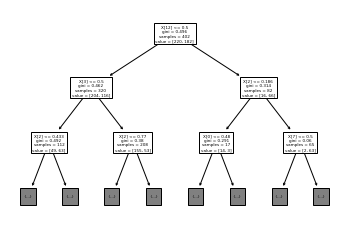

In [75]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier()
dct.fit(X_train, y_train)
print(dct.score(X_train, y_train))
print(dct.score(X_test, y_test))
cv_scores = cross_val_score(dct, X, y, cv=20)
print(cv_scores)
print('Decision Tree cv_scores mean:{}'.format(np.mean(cv_scores)))
from sklearn import tree
tree.plot_tree(dct, max_depth = 2)
#print the decision tree
plt.show()

Try differnt criterions

In [76]:

dct = DecisionTreeClassifier(criterion='entropy')
dct.fit(X_train, y_train)
print(dct.score(X_train, y_train))
print(dct.score(X_test, y_test))
cv_scores = cross_val_score(dct, X, y, cv=20)
print(cv_scores)
print('Decision Tree cv_scores mean:{}'.format(np.mean(cv_scores)))

1.0
0.803030303030303
[0.8        0.83333333 0.8        0.76666667 0.83333333 0.83333333
 0.8        0.86666667 0.86666667 0.86666667 0.93333333 0.8
 0.8        0.86666667 0.9        0.86666667 0.83333333 0.73333333
 0.83333333 0.8       ]
Decision Tree cv_scores mean:0.8316666666666668


In [77]:

dct = DecisionTreeClassifier(criterion='entropy', splitter = "random")
dct.fit(X_train, y_train)
print(dct.score(X_train, y_train))
print(dct.score(X_test, y_test))
cv_scores = cross_val_score(dct, X, y, cv=20)
print(cv_scores)
print('Decision Tree cv_scores mean:{}'.format(np.mean(cv_scores)))

1.0
0.8484848484848485
[0.8        0.83333333 0.63333333 0.76666667 0.83333333 0.8
 0.8        0.86666667 0.8        0.83333333 0.76666667 0.83333333
 0.8        0.8        0.76666667 0.8        0.76666667 0.66666667
 0.76666667 0.73333333]
Decision Tree cv_scores mean:0.7833333333333334


In [78]:

dct = DecisionTreeClassifier(criterion='entropy', min_samples_split=3)
dct.fit(X_train, y_train)
print(dct.score(X_train, y_train))
print(dct.score(X_test, y_test))
cv_scores = cross_val_score(dct, X, y, cv=20)
print(cv_scores)
print('Decision Tree cv_scores mean:{}'.format(np.mean(cv_scores)))

0.9900497512437811
0.7929292929292929
[0.8        0.9        0.83333333 0.8        0.83333333 0.83333333
 0.83333333 0.86666667 0.86666667 0.86666667 0.86666667 0.83333333
 0.73333333 0.8        0.86666667 0.83333333 0.8        0.73333333
 0.83333333 0.83333333]
Decision Tree cv_scores mean:0.8283333333333334


In previous method the best criteria is entropy, and log_loss cannot apply to this method. I now start to test for best "min_samples_split"

In [79]:

from sklearn.model_selection import GridSearchCV

#create new a knn model
clf = DecisionTreeClassifier(criterion='entropy')

#create a dictionary of all values we want to test for n_neighbors
grid_dictionary = {'min_samples_split': np.arange(2,20)}


#use gridsearch to test all values for n_neighbors
GScv = GridSearchCV(clf, grid_dictionary, cv=20)

#fit model to data
GScv.fit(X,y)

print(GScv.best_params_)

{'min_samples_split': 15}


In [80]:
dct = DecisionTreeClassifier(criterion='entropy', min_samples_split=14)
dct.fit(X_train, y_train)
print(dct.score(X_train, y_train))
print(dct.score(X_test, y_test))
cv_scores = cross_val_score(dct, X, y, cv=20)
print(cv_scores)
print('Decision Tree cv_scores mean:{}'.format(np.mean(cv_scores)))

0.927860696517413
0.8434343434343434
[0.83333333 0.8        0.9        0.9        0.86666667 0.83333333
 0.8        0.9        0.93333333 0.93333333 1.         0.8
 0.9        0.83333333 0.9        0.93333333 0.9        0.86666667
 0.93333333 0.86666667]
Decision Tree cv_scores mean:0.8816666666666666


The accuracy inproved a lot, and now is the time to test for min_samples_leaf

In [81]:

from sklearn.model_selection import GridSearchCV

#create new a knn model
clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=14)

#create a dictionary of all values we want to test for n_neighbors
grid_dictionary = {'min_samples_leaf': np.arange(1,20)}


#use gridsearch to test all values for n_neighbors
GScv = GridSearchCV(clf, grid_dictionary, cv=20)

#fit model to data
GScv.fit(X,y)

print(GScv.best_params_)

{'min_samples_leaf': 4}


In [82]:
dct = DecisionTreeClassifier(criterion='entropy', min_samples_split=14,min_samples_leaf=4)
dct.fit(X_train, y_train)
print(dct.score(X_train, y_train))
print(dct.score(X_test, y_test))
cv_scores = cross_val_score(dct, X, y, cv=20)
print(cv_scores)
print('Decision Tree cv_scores mean:{}'.format(np.mean(cv_scores)))

0.9129353233830846
0.8181818181818182
[0.93333333 0.76666667 0.9        0.9        0.9        0.9
 0.8        0.9        0.93333333 0.96666667 1.         0.9
 0.9        0.83333333 0.9        0.93333333 0.93333333 0.86666667
 0.9        0.86666667]
Decision Tree cv_scores mean:0.8966666666666667


The result is even better. Although there still seems to be overfitting

In [83]:
from sklearn.model_selection import GridSearchCV

#create new a knn model
clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=14, min_samples_leaf=4)

#create a dictionary of all values we want to test for n_neighbors
grid_dictionary = {'min_weight_fraction_leaf': np.arange(0,0.5,step = 0.01)}


#use gridsearch to test all values for n_neighbors
GScv = GridSearchCV(clf, grid_dictionary, cv=20)

#fit model to data
GScv.fit(X,y)

print(GScv.best_params_)

{'min_weight_fraction_leaf': 0.0}


since min_weight_fraction_leaf is default value, I directly go to test for max_features

In [84]:
from sklearn.model_selection import GridSearchCV

#create new a knn model
clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=14, min_samples_leaf=4,min_weight_fraction_leaf=0)

#create a dictionary of all values we want to test for n_neighbors
grid_dictionary = {'max_features': np.arange(0,50)}


#use gridsearch to test all values for n_neighbors
GScv = GridSearchCV(clf, grid_dictionary, cv=20)

#fit model to data
GScv.fit(X,y)

print(GScv.best_params_)

{'max_features': 16}


C:\Users\10705\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
680 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
680 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\10705\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\10705\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packa

In [85]:
dct = DecisionTreeClassifier(criterion='entropy', min_samples_split=14,min_samples_leaf=4,max_features=16)
dct.fit(X_train, y_train)
print(dct.score(X_train, y_train))
print(dct.score(X_test, y_test))
cv_scores = cross_val_score(dct, X, y, cv=20)
print(cv_scores)
print('Decision Tree cv_scores mean:{}'.format(np.mean(cv_scores)))
dct.get_depth()

0.9129353233830846
0.8181818181818182
[0.93333333 0.76666667 0.9        0.9        0.9        0.86666667
 0.8        0.9        0.93333333 0.96666667 1.         0.9
 0.9        0.83333333 0.9        0.93333333 0.93333333 0.86666667
 0.9        0.86666667]
Decision Tree cv_scores mean:0.8949999999999999


10

Try for max_depth values(I was not expecting it to work at all but it did return something)

In [86]:

clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=14,min_samples_leaf=4,max_features=16)

#create a dictionary of all values we want to test for n_neighbors
grid_dictionary = {'max_depth': np.arange(0,20)}


#use gridsearch to test all values for n_neighbors
GScv = GridSearchCV(clf, grid_dictionary, cv=20)

#fit model to data
GScv.fit(X,y)

print(GScv.best_params_)

{'max_depth': 14}


C:\Users\10705\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\10705\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\10705\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages

In [87]:
dct = DecisionTreeClassifier(criterion='entropy', min_samples_split=14,min_samples_leaf=4,max_features=16,max_depth=8)
dct.fit(X_train, y_train)
print(dct.score(X_train, y_train))
print(dct.score(X_test, y_test))
cv_scores = cross_val_score(dct, X, y, cv=20)
print(cv_scores)
print('Decision Tree cv_scores mean:{}'.format(np.mean(cv_scores)))

0.9129353233830846
0.8181818181818182
[0.93333333 0.76666667 0.9        0.9        0.9        0.86666667
 0.8        0.9        0.93333333 0.96666667 1.         0.9
 0.9        0.83333333 0.9        0.93333333 0.93333333 0.86666667
 0.9        0.86666667]
Decision Tree cv_scores mean:0.8949999999999999


No improvement, now try the last criteria

In [88]:

clf = DecisionTreeClassifier(criterion='entropy', min_samples_split=14,min_samples_leaf=4,max_features=16)

#create a dictionary of all values we want to test for n_neighbors
grid_dictionary = {'max_leaf_nodes': np.arange(1,200)}


#use gridsearch to test all values for n_neighbors
GScv = GridSearchCV(clf, grid_dictionary, cv=20)

#fit model to data
GScv.fit(X,y)

print(GScv.best_params_)

{'max_leaf_nodes': 25}


C:\Users\10705\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 3980.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\10705\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\10705\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-package

In [89]:
dct = DecisionTreeClassifier(criterion='entropy', min_samples_split=14,min_samples_leaf=4,max_features=16,max_leaf_nodes=25)
dct.fit(X_train, y_train)
print(dct.score(X_train, y_train))
print(dct.score(X_test, y_test))
cv_scores = cross_val_score(dct, X, y, cv=20)
print(cv_scores)
print('Decision Tree cv_scores mean:{}'.format(np.mean(cv_scores)))

0.9129353233830846
0.8181818181818182
[0.93333333 0.8        0.9        0.9        0.86666667 0.86666667
 0.8        0.9        0.93333333 0.96666667 1.         0.9
 0.9        0.83333333 0.9        0.93333333 0.93333333 0.86666667
 0.9        0.86666667]
Decision Tree cv_scores mean:0.8949999999999999


So I finally reached 90% accuracy, with possibly some overfitting? But percentage-wise this is the best result, and I decided to select the criterias I applied. The second best choice is SVC with C = 2.4.

### SELECT FINAL CLASSIFIER
After all the experiments, select the classifier with the best accuracy (you used cross-validation).

Now break your dataset into two parts (using 1:2 ratio) and use one part for testing and 2 parts for building the model.

After you buid the final model, make the predictions for each instance in the test set, and record these predictions as _PROBABILITIES_ of belonging to the 'pep' class. __Store these predictions in a separate csv file. This is the input for Part II of this mini-project.__

In [117]:
X_save = df_num.drop(columns=['pep'])
y_save = df_num['pep']
from sklearn.model_selection import train_test_split

#split dataset into train and test data
X_strain, X_stest, y_strain, y_stest = train_test_split(X_save, y_save, test_size=0.33)

y_strain = y_strain.values
y_stest = y_stest.values

In [118]:


print(type(y_strain))

dct = DecisionTreeClassifier(criterion='entropy', min_samples_split=14,min_samples_leaf=4,max_features=16,max_leaf_nodes=25)
dct.fit(X_strain, y_strain)
print(dct.score(X_strain, y_strain))


<class 'numpy.ndarray'>
0.8980099502487562


In [119]:
import pandas as pd
y_predict = dct.predict_proba(X_stest)

save = pd.DataFrame(y_predict, columns = ['predicted no', 'predicted yes']).reset_index(drop=True)
y_actual = pd.DataFrame(y_stest, columns = ['actual yes']).reset_index(drop=True)

save = pd.concat([save, y_actual, X_stest.reset_index(drop=True)], axis=1)



In [120]:
file_name = "prediction.csv"
save.to_csv(file_name, sep=',')

## Part II. Business pitch

### Lift chart
The result of the previous part is the table of predicted class labels for each instance in the test set. The predictions are expressed in terms of probability of being classified as 'pep' - that is, probability that the respondents buy the equity plan.

Our main business proposal is to take a new dataset of potential subscribers, predict their response using our best model, and use only top-ranked customers for the next promotion. 

Here we want to persuade the bank that targeting selected customers will improve the campaign efficiency: that we can achieve a much better response rate.

First, we sort the test dataset by the predicted class - from Yes to No, and then by probability (from highest to the lowest for Yes and from lowest to highest for No). Keep the sorted file separately from the original test set - we need both datasets.

Next, we count the number of successfully predicted subscribers, adding for each row in the sorted dataset the cumulative number of customers which responded to the offer. Now, for each number of letter sent we plot the total number of positive responses (see image below for an example). 

<img src = "images/counts.png" text-align="center" width=50%>

What can we learn from this chart? The logic is that if we send 10 letters - the success rate of these letters will be high, because 9 out of 10 would reply. If we send 100 letters the success rate would be 69%. However with 100 letters this means 69 new subscribers, and with 10 - only 9. We want to know what is the optimal number of letters to be sent to maximize the profit.

<img src = "images/LiftChart.png" text-align="center" width=50%>

For business audience we visualize the results using lift charts, where on the X axis is a number of letters sent, and on the Y axis is the proportion of positive responses for the random mailing and for the mailing which would use the top-ranked customers first. Lift (in the business world) is the ratio of the expected ‘Yes’ responses using the top of predicted list to the number of ‘Yes’ responses from the same number of randomly selected customers. Lift measures the change in the concentration of a target class when the model is applied to the future dataset. Note that if we would send all 180 letters we would have 83 positive responses (46% total success) in both cases.

Analyzing this chart, we can see that by sending mails to only 73/180 = 40% of the customers from the top of the ranked list, we should be able to cover 82% of potential responders. 

Note that we cannot ever cover all 100% of responsive customers, unless we send letters to everybody - our model does not give 100% correct answers.

__Create the Lift chart from your results, and write a couple of sentences pitching the use of a classifier.__

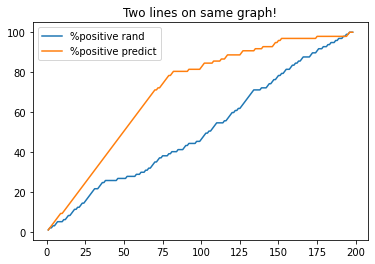

In [121]:
usage = save.copy()
import matplotlib.pyplot as plt
X_plot = []
Y_plot = []
Y_count = 0
Y_sum = save['actual yes'].sum()

for i in range(len(X_stest)):
    X_plot.append(i+1)
    Y_count = Y_count + save['actual yes'][i].astype('int')
    Y_plot.append(Y_count/Y_sum * 100)
plt.plot(X_plot, Y_plot, label = "%positive rand")
usage = usage.sort_values('predicted no')
values = usage['actual yes'].values
#print(save['actual yes'])
X_plot1 = []
Y_plot1 = []
Y_count1 = 0
for i in range(len(X_stest)):
    X_plot1.append(i+1)
    Y_count1 = Y_count1 + values[i]
    Y_plot1.append(Y_count1/Y_sum*100)
plt.plot(X_plot1, Y_plot1, label = "%positive predict")
plt.title('Two lines on same graph!')
plt.legend()
plt.show()

In [122]:
dif = 0
max_at = 0
for i in range(len(X_stest)):
    if Y_plot1[i]-Y_plot[i] > dif:
        dif = Y_plot1[i]-Y_plot[i]
        max_at = i+1
print(dif, max_at)
print(Y_plot1[max_at - 1] , Y_plot[max_at-1])
print(Y_plot1[max_at - 1] * Y_sum/100, Y_plot[max_at-1] * Y_sum/100)


40.20618556701031 82
80.41237113402062 40.20618556701031
78.0 39.0


Analyzing this chart, we can see that by sending mails to only 89/198 = 45% of the customers from the top of the ranked list, we should be able to cover 81.1% of potential responders, or 78 pep out of 82 sent. This is much better than selecting customers randomly, which we would only get 40.2% of potential responders, or 39 pep out of 82 sent. Thus, using the classifier do looks beneficial for sending out mails.

### Cost-benefit analysis

Just showing the lift chart might be not enough to persuade bank to apply your classifier. We need to estimate potential revenue.

How to choose the optimal number of letters to send? This depends on the:
- Cost of each mail: for example, let it be $4
- Benefit from each accepted PEP: let it be $15
These unrealistic numbers were chosen because of the very small size of the validation dataset – to demonstrate the concept of maximum profit. In real life, the cost of mailing is several cents, and the benefit is hundreds and thousands dollars, but the real datasets of mailings contain millions of records.

Then for each row in the sorted table:
- We multiply each count of total sent by 4 - the cost of sending
- We multiply each positive count by 15 - expected benefit (not everything that we predicted as positive was actually positive, some of our predictions were wrong).
- We subtract the cost from the benefit. 
This produces an expected revenue for a given number of letters sent.

In my results sending about 71-73 letters gave the maximum profit of ~ 700 dollars. This profit cannot be achieved by random mailing, this is the profit to our company that we created using machine learning. BTW, what would be the total profit if we sent just 73 letters from the random dataset?

__What are your results? Did you manage to generate more profit?__ Briefly discuss your results and what did you learn from this project.


In [123]:
max_profit = 0
profit = 0
max_at = 0
responded = 0
max_responded = 0
for i in range(len(X_stest)):
    profit = profit - 4 + 15*values[i]
    responded = responded + values[i]
    if(profit > max_profit):
        max_profit = profit
        max_at = i+1
        max_responded = responded
print(max_profit, max_at, max_responded)



842 82 78


I got more profit when sending 82 letters with 78 responses at $842. Note that different set of data gives different results, but I have tried five times and the profit ranges from 750~842. Thus, the classifier seems to work well.

Copyright &copy; 2022 Marina Barsky.